# Predicting Product Sales from TV, Radio and Newspaper Advertising Budgets
**Author:** Jesse Martin
**Course:** Introduction to Machine Learning: Supervised Learning 
**Date:** October 2025

---

**Contents** 
- [1. Problem Definition](#1.-Problem-Definition)
- [2. Setup and Load Data](#2.-Setup-and-Load-Data)
- [3. Data Inspection](#3.-Data-Inspection)
- [4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
- [5. Feature Preparation](#5.-Feature-Preparation)
- [6. Linear Regression Model](#6.-Linear-Regression-Model)
- [7. Model Interpretation](#7.-Model-Interpretation)
- [8. Residual Analysis](#8.-Residual-Analysis)
- [9. Actual vs Predicted](#9.-Actual-vs-Predicted)
- [10. Model Refinement](#10.-Model-Refinement)
- [11. Conclusion](#11.-Conclusion)


## 1. Problem Definition

**Goal:**  
Predict the total number of total number of sales for a product based off the different types of advertising budgets.

**Type:**  
Linear Regression  

**Target Variable:**  
Sales

**Column Descriptions:**<br>
TV, Radio and Newspaper - Spending in Thousands of Dollars <br>
Sales - Units sold in thousands

**Link to dataset:**
https://www.kaggle.com/datasets/ashydv/advertising-dataset/data

## 2. Setup and Load Data

In [1]:
# Imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import sklearn
np.random.seed(42)

In [2]:
# Import data
file_path = "advertising.csv"
df = pd.read_csv(file_path)

# Check data
print("Shape:", df.shape)
df.head()

Shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 3. Data Inspection

In [3]:
# Inspect structure and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# Summary statistics for numeric columns
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# Check for missing values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No missing values are present. All datatypes are of float64 so no conversion should be required. 200 Total observations.

## 4.  Exploratory Data Analysis

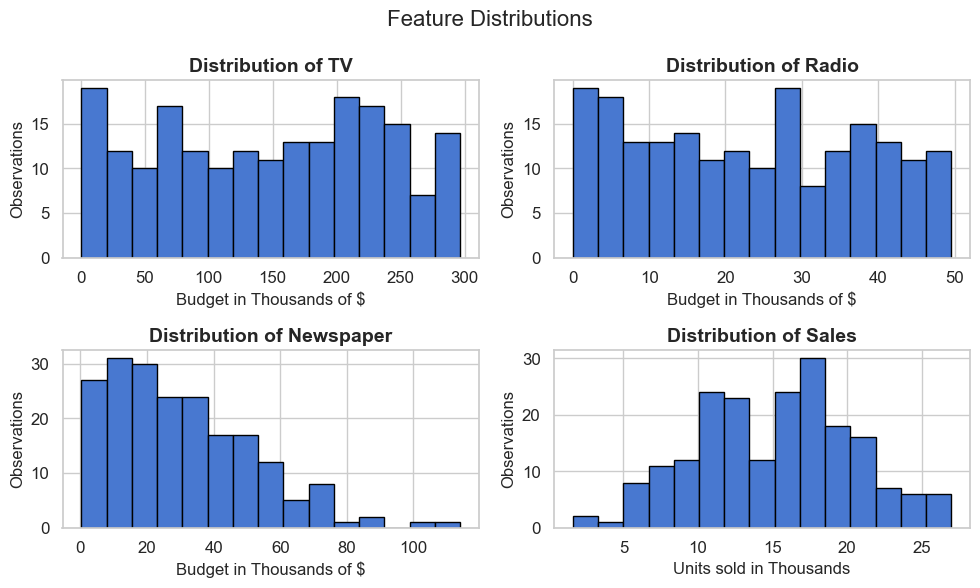

In [6]:
# Plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Plot histograms for each feature
axes = df.hist(figsize=(10,6), bins=15, edgecolor='black')
for ax in axes.ravel():
    if ax.get_title() == 'Sales':
        ax.set_xlabel("Units sold in Thousands", fontsize=12)
    else:
        ax.set_xlabel("Budget in Thousands of $", fontsize=12)
    ax.set_ylabel("Observations", fontsize=12)
    ax.set_title(f"Distribution of {ax.get_title()}", fontsize=14, fontweight='bold')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

TV appears to usually have a higher budget compared to radio and newspaper budgets. Newspaper distribution is right skewed, indicating relatively few high spenders

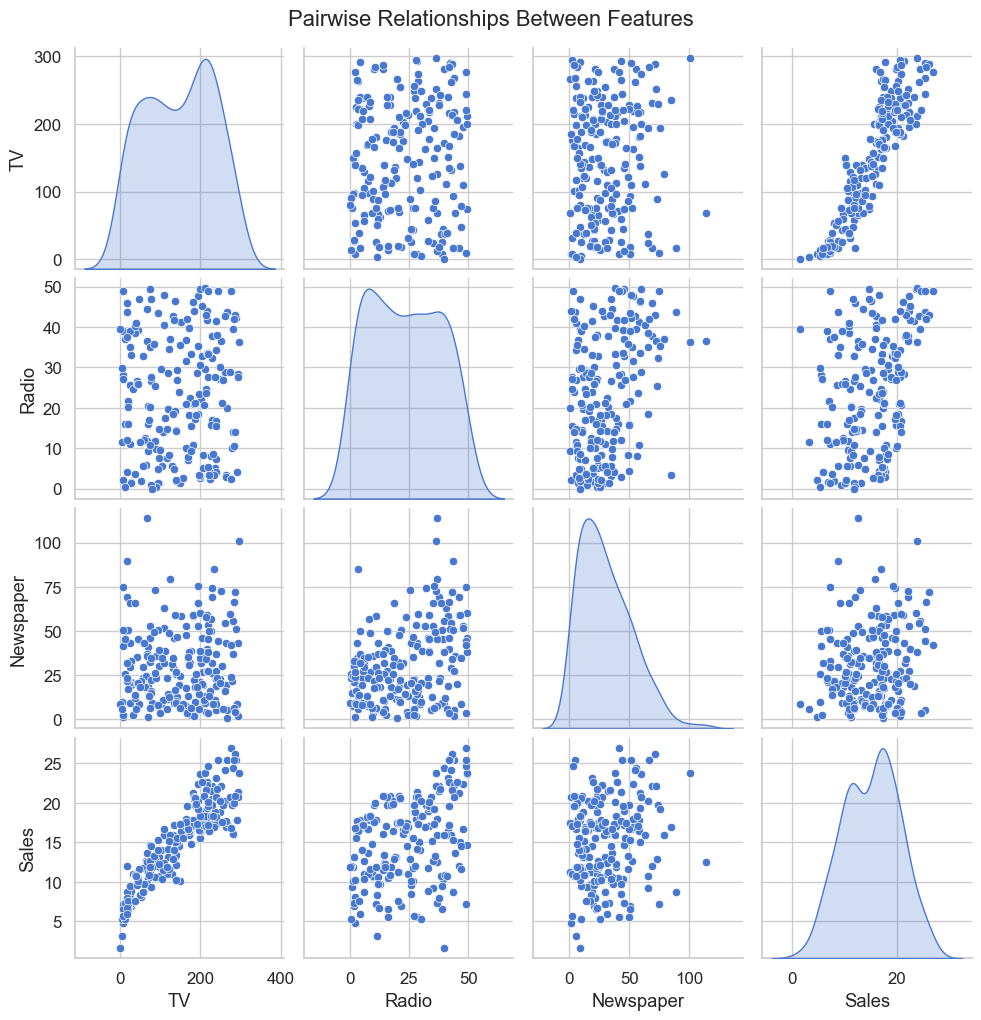

In [7]:
# Pairplot
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

Sales appear to increase relatively linearly with TV spending and possibly somewhat with Radio, not as much with Newspaper spending.

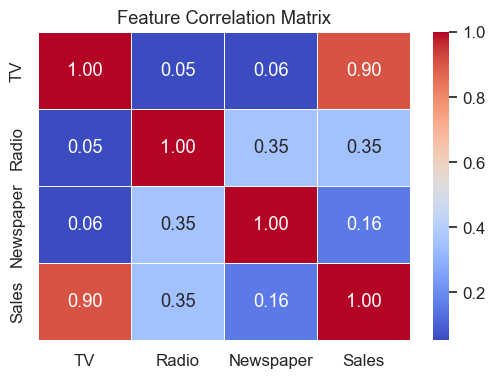

In [8]:
# Correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

TV spending has a strong correlation with sales. Radio and Newspaper spending has much weaker correlation with sales.

## 5. Feature Preparation
This dataset is already very clean so all we have to do is separate the data into X (TV,Radio,Newspaper) and y (Sales) and train and test sets

In [9]:
from sklearn.model_selection import train_test_split

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred = lin_reg.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R² Score: 0.906
RMSE: 1.705


## 7. Model Interpretation


In [11]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_reg.coef_
})
intercept = lin_reg.intercept_

print(f"Intercept: {intercept:.3f}")
display(coef_df)

Intercept: 4.714


,Feature,Coefficient
0,TV,0.054509
1,Radio,0.100945
2,Newspaper,0.004337


Radio and TV had the largest impact on sales with Newspaper having a relatively low impact which aligns with its low correlation.

## 8. Residual Analysis

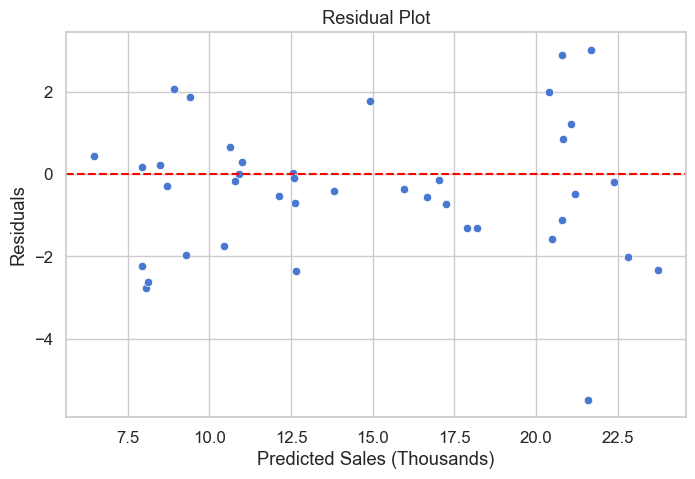

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales (Thousands)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## 9. Actual vs Predicted

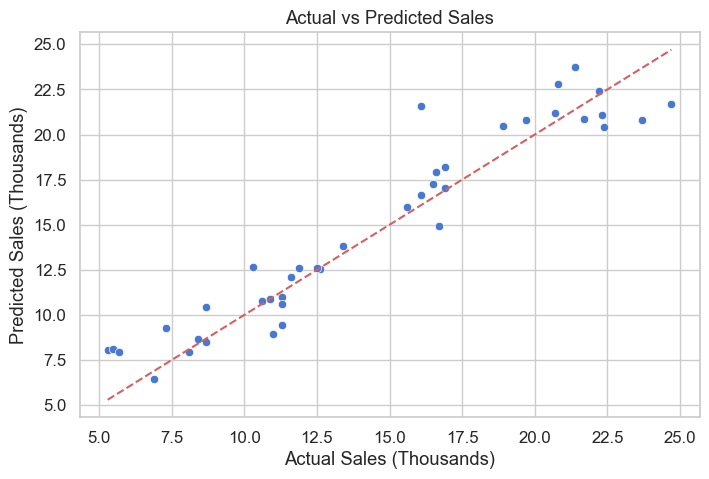

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales (Thousands)")
plt.ylabel("Predicted Sales (Thousands)")
plt.title("Actual vs Predicted Sales")
plt.show()

## 10. Model Refinement

In [14]:
X_refined = df[['TV', 'Radio']]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_refined, y, test_size=0.2, random_state=42)

lin_reg_r = LinearRegression()
lin_reg_r.fit(X_train_r, y_train_r)

y_pred_r = lin_reg_r.predict(X_test_r)

r2_r = r2_score(y_test_r, y_pred_r)
rmse_r = np.sqrt(mean_squared_error(y_test_r, y_pred_r))

print(f"Refined R² Score: {r2_r:.3f}")
print(f"Refined RMSE: {rmse_r:.3f}")

Refined R² Score: 0.908
Refined RMSE: 1.687


In [15]:
comparison = pd.DataFrame({
    'Model': ['Baseline (TV + Radio + Newspaper)', 'Refined (TV + Radio)'],
    'R² Score': [r2, r2_r],
    'RMSE': [rmse, rmse_r]
})
comparison

,Model,R² Score,RMSE
0,Baseline (TV + Radio + Newspaper),0.905901,1.705215
1,Refined (TV + Radio),0.907880,1.687192


Removing Newspaper spending simplifies the model, reducing noise and as a result increased its predictive accuracy

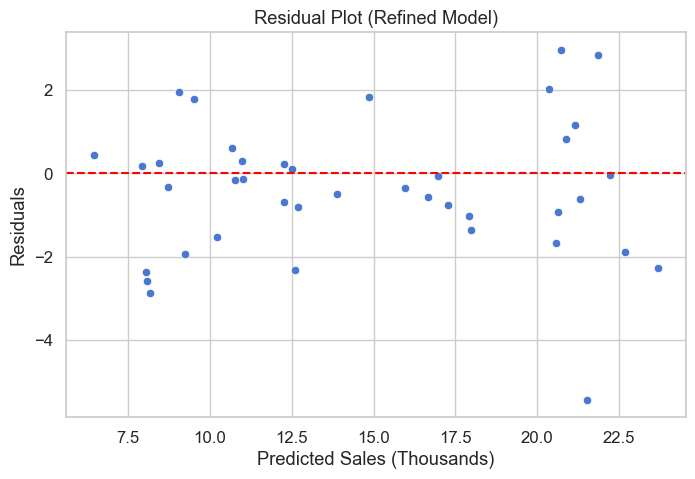

In [16]:
residuals_r = y_test_r - y_pred_r

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_r, y=residuals_r)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales (Thousands)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Refined Model)")
plt.show()

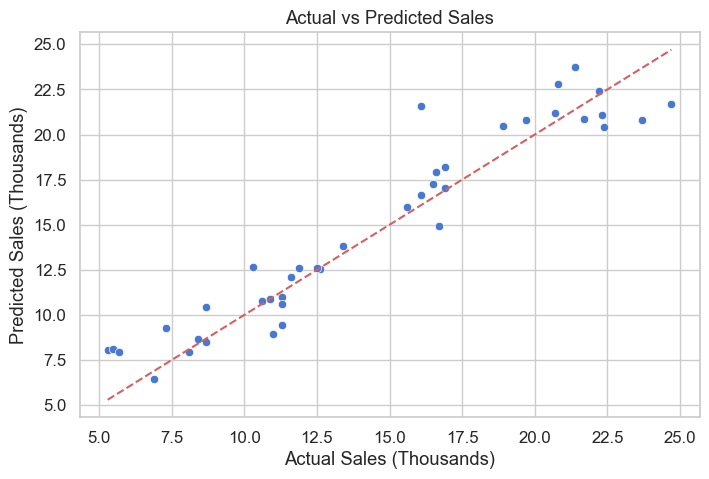

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales (Thousands)")
plt.ylabel("Predicted Sales (Thousands)")
plt.title("Actual vs Predicted Sales")
plt.show()

## 11. Conclusion
This project demonstrates that sales numbers can be accurately predicted using advertising budgets. Newspaper spending added little predictive power and the removal of it from the model simplified it, increasing accuracy. The refined model achieved a R^2 of 0.908 and a RMSE of 1.687 showing a good fit and low prediction error.